In [1]:
!pip install hrv-analysis

In [2]:
!pip install wfdb


In [3]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
import shutil
import posixpath
from collections import defaultdict
import wfdb



In [4]:
dbs = wfdb.get_dbs()
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')



# Download all the WFDB content
wfdb.dl_database('apnea-ecg', dl_dir=dl_dir)
files = os.listdir(dl_dir)
# Display the downloaded content in the folder
display(os.listdir(dl_dir))

Generating record list for: a01
Generating record list for: a01er
Generating record list for: a01r
Generating record list for: a02
Generating record list for: a02er
Generating record list for: a02r
Generating record list for: a03
Generating record list for: a03er
Generating record list for: a03r
Generating record list for: a04
Generating record list for: a04er
Generating record list for: a04r
Generating record list for: a05
Generating record list for: a06
Generating record list for: a07
Generating record list for: a08
Generating record list for: a09
Generating record list for: a10
Generating record list for: a11
Generating record list for: a12
Generating record list for: a13
Generating record list for: a14
Generating record list for: a15
Generating record list for: a16
Generating record list for: a17
Generating record list for: a18
Generating record list for: a19
Generating record list for: a20
Generating record list for: b01
Generating record list for: b01er
Generating record list for

['a01.apn',
 'a01.dat',
 'a01.hea',
 'a01.qrs',
 'a01er.apn',
 'a01er.hea',
 'a01er.qrs',
 'a01r.apn',
 'a01r.dat',
 'a01r.hea',
 'a02.apn',
 'a02.dat',
 'a02.hea',
 'a02.qrs',
 'a02er.apn',
 'a02er.hea',
 'a02er.qrs',
 'a02r.apn',
 'a02r.dat',
 'a02r.hea',
 'a03.apn',
 'a03.dat',
 'a03.hea',
 'a03.qrs',
 'a03er.apn',
 'a03er.hea',
 'a03er.qrs',
 'a03r.apn',
 'a03r.dat',
 'a03r.hea',
 'a04.apn',
 'a04.dat',
 'a04.hea',
 'a04.qrs',
 'a04er.apn',
 'a04er.hea',
 'a04er.qrs',
 'a04r.apn',
 'a04r.dat',
 'a04r.hea',
 'a05.apn',
 'a05.dat',
 'a05.hea',
 'a05.qrs',
 'a06.apn',
 'a06.dat',
 'a06.hea',
 'a06.qrs',
 'a07.apn',
 'a07.dat',
 'a07.hea',
 'a07.qrs',
 'a08.apn',
 'a08.dat',
 'a08.hea',
 'a08.qrs',
 'a09.apn',
 'a09.dat',
 'a09.hea',
 'a09.qrs',
 'a10.apn',
 'a10.dat',
 'a10.hea',
 'a10.qrs',
 'a11.apn',
 'a11.dat',
 'a11.hea',
 'a11.qrs',
 'a12.apn',
 'a12.dat',
 'a12.hea',
 'a12.qrs',
 'a13.apn',
 'a13.dat',
 'a13.hea',
 'a13.qrs',
 'a14.apn',
 'a14.dat',
 'a14.hea',
 'a14.qrs',
 'a1

In [97]:
records=[]
for file in files:
    record = file.split('.',1)[0]
    if record not in records and record[-1] != 'r':
        records.append(record)

In [100]:
records

['a01',
 'a02',
 'a03',
 'a04',
 'a05',
 'a06',
 'a07',
 'a08',
 'a09',
 'a10',
 'a11',
 'a12',
 'a13',
 'a14',
 'a15',
 'a16',
 'a17',
 'a18',
 'a19',
 'a20',
 'b01',
 'b02',
 'b03',
 'b04',
 'b05',
 'c01',
 'c02',
 'c03',
 'c04',
 'c05',
 'c06',
 'c07',
 'c08',
 'c09',
 'c10',
 'x01',
 'x02',
 'x03',
 'x04',
 'x05',
 'x06',
 'x07',
 'x08',
 'x09',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35']

In [7]:
#!pip install matplotlib.pyplot

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot
ERROR: No matching distribution found for matplotlib.pyplot


### Visualing some data from one record

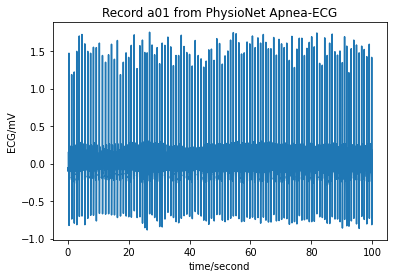

{'record_name': 'a01',
 'n_sig': 1,
 'fs': 100,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 10000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG'],
 'p_signal': array([[-0.06 ],
        [-0.065],
        [-0.06 ],
        ...,
        [-0.095],
        [-0.07 ],
        [-0.035]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a01.dat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [200.0],
 'baseline': [0],
 'units': ['mV'],
 'adc_res': [12],
 'adc_zero': [0],
 'init_value': [-12],
 'checksum': [64591],
 'block_size': [0]}

In [8]:
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing
import matplotlib as plt

# Load the WFDB record 10 sec segment and the physical samples
record = wfdb.rdrecord('tmp_dl_dir/a01', sampfrom=0, sampto=10000)

wfdb.plot_wfdb(record=record, time_units='seconds', title='Record a01 from PhysioNet Apnea-ECG') 
display(record.__dict__)

In [91]:
def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

In [10]:
#!pip install biosppy

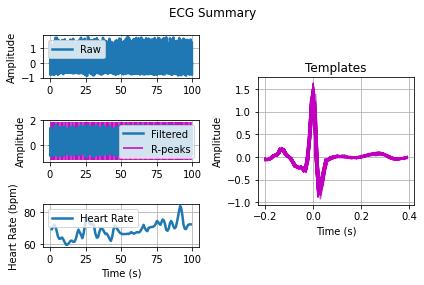

In [11]:
import biosppy
ind= biosppy.signals.ecg.ecg(record.p_signal[:,0], sampling_rate=100, show=True)

### Now to extract all features in a numerical format for all records

In [110]:
# Store the results in a dictionary
results =  defaultdict(list)

In [66]:
# remove ectopic beats and interpolate
from hrvanalysis import remove_ectopic_beats, interpolate_nan_values, get_time_domain_features, get_frequency_domain_features, get_geometrical_features
from hrvanalysis import get_csi_cvi_features, get_poincare_plot_features


13 ectopic beat(s) have been deleted with malik rule.


In [111]:
# Extracting features for all records

for i in range(len(records)):
    record = wfdb.rdrecord('tmp_dl_dir/'+records[i], sampfrom=0,sampto=100000)
    ind = biosppy.signals.ecg.ecg(record.p_signal[:,0], sampling_rate=100, show=False)
    print(records[i])
    rr_ind = np.diff(ind['rpeaks'])
    rr_ms = [element * 10 for element in rr_ind]
    ect_ind = remove_ectopic_beats(rr_ms)
    nn_interval = interpolate_nan_values(rr_intervals=ect_ind)
    
    ## Time Domain Measures
    time_dict = get_time_domain_features(nn_interval)    
    results['AVNN'].append(time_dict['mean_nni'])
    results['HR'].append(time_dict['mean_hr'])
    results['SDNN'].append(time_dict['sdnn'])
    results['pNN50'].append(time_dict['pnni_20'])
    results['RMSSD'].append(time_dict['rmssd'])
    results['HRdiff'].append(time_dict['max_hr'] - time_dict['min_hr'])
    
    # Frequency Domain Measures
    # Apply a Fast Fourier Transform (FFT) to the time-series data to obtain frequency domain measure
    freq_dict = get_frequency_domain_features(nn_interval)      
    results['VLF'].append(freq_dict['vlf'])
    results['LF'].append(freq_dict['lf'])
    results['HF'].append(freq_dict['hf'])
    results['LHFratio'].append(freq_dict['lf_hf_ratio'])
    results['Record'].append(records[i])
print(results.keys())
    
    

a01
10 ectopic beat(s) have been deleted with malik rule.
a02
20 ectopic beat(s) have been deleted with malik rule.
a03
6 ectopic beat(s) have been deleted with malik rule.
a04
17 ectopic beat(s) have been deleted with malik rule.
a05
2 ectopic beat(s) have been deleted with malik rule.
a06
13 ectopic beat(s) have been deleted with malik rule.
a07
4 ectopic beat(s) have been deleted with malik rule.
a08
7 ectopic beat(s) have been deleted with malik rule.
a09
10 ectopic beat(s) have been deleted with malik rule.
a10
0 ectopic beat(s) have been deleted with malik rule.
a11
5 ectopic beat(s) have been deleted with malik rule.
a12
41 ectopic beat(s) have been deleted with malik rule.
a13
6 ectopic beat(s) have been deleted with malik rule.
a14
25 ectopic beat(s) have been deleted with malik rule.
a15
6 ectopic beat(s) have been deleted with malik rule.
a16
0 ectopic beat(s) have been deleted with malik rule.
a17
0 ectopic beat(s) have been deleted with malik rule.
a18
11 ectopic beat(s) h

In [112]:
len(results['AVNN'])

70

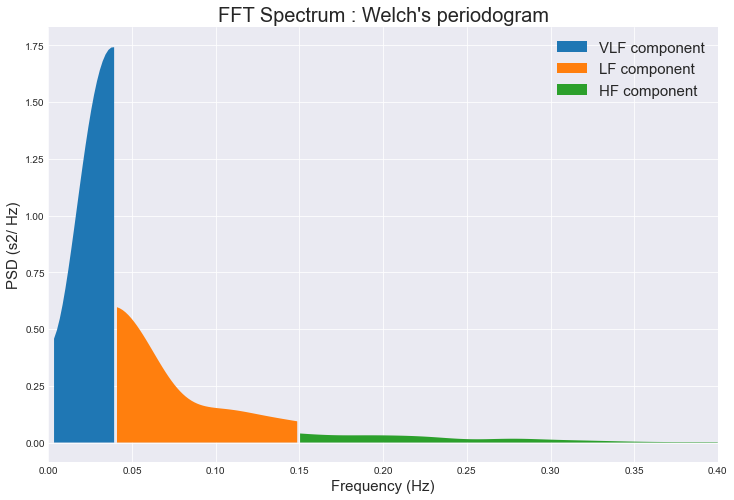

In [20]:
from hrvanalysis import plot_psd

plot_psd(nn_interval, method="welch")

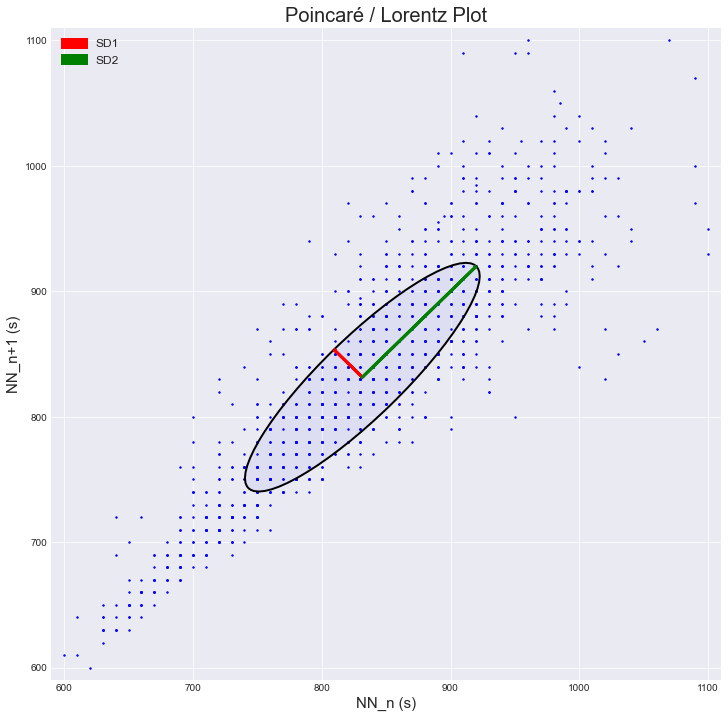

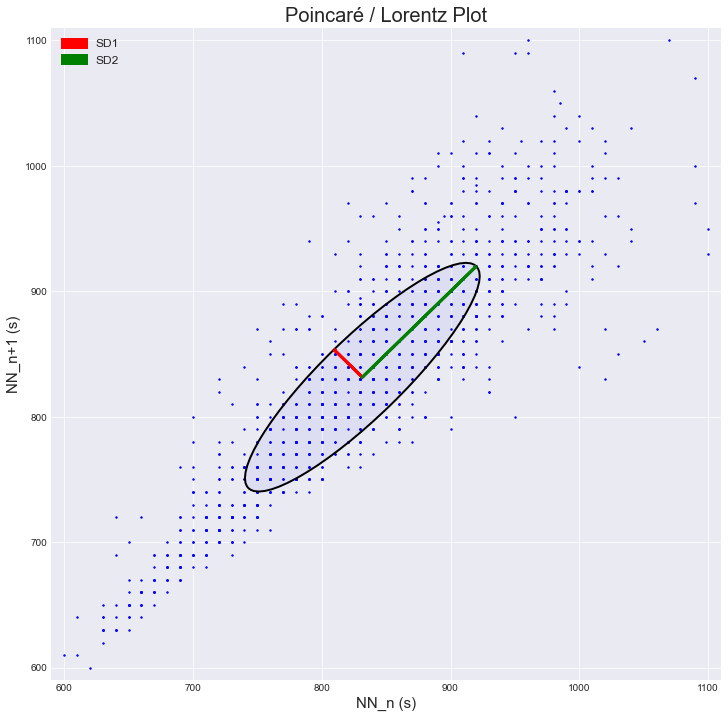

In [21]:
from hrvanalysis import plot_poincare

plot_poincare(nn_interval)
plot_poincare(nn_interval, plot_sd_features=True)

In [22]:
import csv


In [113]:
extracted_features = pd.DataFrame.from_dict(results)

In [114]:

extracted_features.to_csv('extracted_features.csv')